In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='../data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='../data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


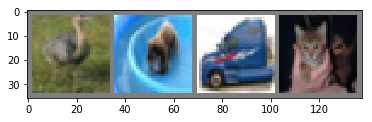

 bird   dog truck   cat


In [7]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.136
[1,  4000] loss: 1.801
[1,  6000] loss: 1.647
[1,  8000] loss: 1.594
[1, 10000] loss: 1.514
[1, 12000] loss: 1.461
[2,  2000] loss: 1.396
[2,  4000] loss: 1.364
[2,  6000] loss: 1.335
[2,  8000] loss: 1.328
[2, 10000] loss: 1.280
[2, 12000] loss: 1.245
Finished Training


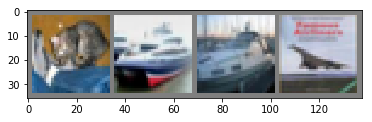

GroundTruth:    cat  ship  ship plane


In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [15]:
images[0][0][0]

tensor([ 0.2392,  0.2471,  0.2941,  0.3020,  0.2549,  0.2235,  0.2706,  0.2471,
         0.2392,  0.2471,  0.2627,  0.2549,  0.2627,  0.3020,  0.3255,  0.3333,
         0.3098,  0.2706,  0.2549,  0.2549,  0.2235,  0.1686,  0.1765,  0.1608,
         0.1686,  0.1216,  0.0980,  0.1059,  0.1216,  0.0745, -0.0118, -0.0902])

In [16]:
outputs = net(images)

In [17]:
outputs

tensor([[-0.4006, -0.8896, -0.4890,  1.5157, -0.9187,  0.7183,  0.2160, -0.8228,
          0.9729, -0.3671],
        [ 6.4098,  3.7973, -1.5921, -2.5854, -3.2021, -4.1322, -3.9271, -4.4929,
          8.3467,  1.3501],
        [ 2.5713,  2.1554, -0.8800, -1.0333, -2.3090, -2.0119, -1.6753, -2.8110,
          3.9985,  1.5324],
        [ 4.4084,  0.3554,  0.4077, -1.6701, -0.4609, -2.8275, -2.1544, -3.1750,
          5.2663, -0.6742]], grad_fn=<AddmmBackward>)

In [18]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [22]:
predicted

tensor([3, 8, 8, 8])

In [21]:
outputs[0]

tensor([-0.4006, -0.8896, -0.4890,  1.5157, -0.9187,  0.7183,  0.2160, -0.8228,
         0.9729, -0.3671], grad_fn=<SelectBackward>)

In [23]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [32]:
for data in testloader:
    print (data)
    print (labels)
    break

[tensor([[[[ 0.2392,  0.2471,  0.2941,  ...,  0.0745, -0.0118, -0.0902],
          [ 0.1922,  0.1843,  0.2471,  ...,  0.0667, -0.0196, -0.0667],
          [ 0.1843,  0.1843,  0.2392,  ...,  0.0902,  0.0196, -0.0588],
          ...,
          [-0.4667, -0.6706, -0.7569,  ..., -0.7020, -0.8980, -0.6863],
          [-0.5216, -0.6157, -0.7255,  ..., -0.7961, -0.7725, -0.8431],
          [-0.5765, -0.5608, -0.6471,  ..., -0.8118, -0.7333, -0.8353]],

         [[-0.1216, -0.1294, -0.0902,  ..., -0.2549, -0.2863, -0.3333],
          [-0.1216, -0.1373, -0.1059,  ..., -0.2549, -0.2863, -0.3098],
          [-0.1373, -0.1451, -0.1294,  ..., -0.2314, -0.2549, -0.3020],
          ...,
          [-0.0275, -0.2157, -0.3098,  ..., -0.2392, -0.4980, -0.3333],
          [-0.0902, -0.2000, -0.3333,  ..., -0.3569, -0.3569, -0.4980],
          [-0.1608, -0.1765, -0.3020,  ..., -0.3961, -0.3412, -0.4745]],

         [[-0.6157, -0.6314, -0.6000,  ..., -0.7176, -0.7176, -0.7412],
          [-0.6000, -0.6863, 

In this post, I show an example of using deep learning techniques to identify objects on images. The example assume that you are familiar with the theory of the neural networks and Python.

I will use Convolutional Neural Networks (CNN or Conv Net) algorithm which are very similar to ordinary Neural Networks and CIFAR-10 dataset (60000 32x32 colour images in 10 classes, with 6000 images per class).

In src folder, you can find more examples for:

Regression and supervised learning using Multilayer Perceptron (MLP)
Image classification with advanced features (image augmentation, ...) using Convolutional Neural Networks (CNN or Conv Net)
Time series or text generation using Recurrent Neural Networks (RNN ans specialy LSTM)
All input datasets are ind data folder or Keras package (so you need internet access for Keras dataset like CIFAR-10)

Overview
Requirements
Load Python modules and datasets
Prepare data
Model architecture
Model Training
Model evaluation
1- Requirements
Python 2.7
Numpy
Matplotlib
keras
TensorFlow or Theano
Internet